In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.CodeMirror {font-family:Consolas; font-size:13pt;}
div.output {font-size:13pt; font-weight : bold;}
div.input {font-family:Consolas; font-size:13pt;}
</style>
"""))

In [1]:
import numpy as np # csv 파일을 numpy 배열로 읽기
import pandas as pd
import sys
import tensorflow.keras.utils as utils # 원 핫 인코딩
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Dense, Activation
import matplotlib.pyplot as plt # 그래프

# 1. 데이터 set 생성 및 전처리

In [3]:
# csv파일을 Dataframe으로 읽어와서 numpy배열로 변환
df = pd.read_csv('data/pima-indians-diabetes.csv', comment = '#', 
                 header = None)
dataset = np.array(df)

dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [4]:
# np.set_printoptions(threshold = sys.maxsize)

In [5]:
# csv파일을 numpy배열로 읽어오기
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',')

dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [6]:
dataset.shape

(768, 9)

In [7]:
# 훈련set : 검증set = 7:3 
x_train = dataset[:700, :-1] # 1행부터 699행까지의 데이터로 훈련시키기
y_train = dataset[:700, -1]

# 테스트set(시험데이터 = 시험set)
x_test = dataset[700:, :-1] # 700행부터 마지막행까지의 데이터로 테스트해보기
y_test = dataset[700:, -1]

In [8]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((700, 8), (700,), (68, 8), (68,))

# 2. 모델 구성

In [9]:
model = Sequential()

# input_dim = 8, 최종 출력 = 1
model.add(Dense(12, input_dim = 8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# 3. 학습과정 설정

In [10]:
model.compile(loss      = 'binary_crossentropy',
              optimizer = 'adam', 
              metrics   = ['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


# 4. 학습시키기

In [ ]:
hist = model.fit(x_train, y_train,  
                 epochs     = 1500, # 반복 횟수 
                 batch_size = 64, 
                 verbose    = 2)

# 1500번의 학습결과 출력

# 5. 모델 평가
- 학습과정보기
- 평가

In [13]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

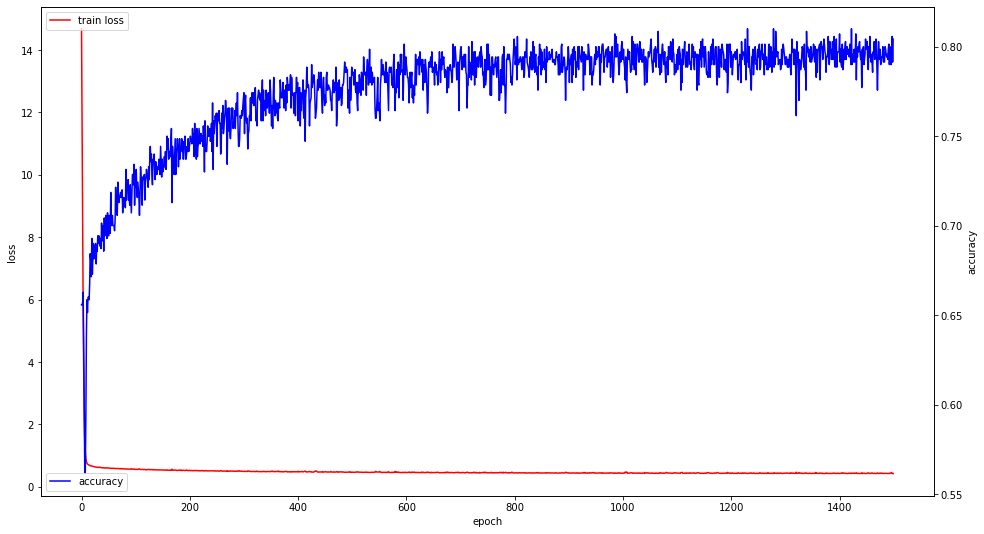

In [14]:
# 모델의 학습과정 그래프로 나타내기
fig, loss_ax = plt.subplots(figsize = (16, 9))
loss_ax.plot(hist.history['loss'], 
             'r',
             label = 'train loss')

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 
            'b', 
            label = 'accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

In [15]:
# 모델 평가하기
score = model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 0s/step - loss: 0.6187 - accuracy: 0.7794


In [17]:
print('loss : %s\naccuracy : %s' % (score[0], score[1]))

loss : 0.6186999082565308
accuracy : 0.779411792755127


# 6. 모델 사용하기

In [18]:
model.predict(np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]]))

array([[0.6644127]], dtype=float32)

# 원-핫 인코딩을 사용한 예측

* 피마 인디언 당뇨발병 예측 (위는 binary classification이어서 원핫인코딩을 안함)
* 원핫인코딩을 사용한 예측
1. 데이터 셋을 가져와 (훈련셋, 검증셋), (예측(독립)변수와 결과(타겟)변수)로 나눈다. 결과변수는 원핫인코딩
2. 모델생성(input_dim = 8, 최종 출력 = 2, activation함수에는 softmax)
3. 모델 학습과정 설정
4. 모델 학습하기
5. 모델 평가하기
6. 모델 사용하기

In [ ]:
# activation = Activation('relu')

In [2]:
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',')

dataset.shape

(768, 9)

In [3]:
from tensorflow.keras.utils import to_categorical
# 훈련set : 검증set = 6:4 
x_train = dataset[:600, :-1] # 1행부터 460행까지(마지막 열 빼고)의 데이터로 훈련시키기
y_train = dataset[:600, -1] # 마지막열의 460행까지의 데이터

x_val = dataset[600:700, :-1] # 1행부터 460행까지(마지막 열 빼고)의 데이터로 훈련시키기
y_val = dataset[600:700, -1]

# 테스트set(시험데이터 = 시험set)
x_test = dataset[700:, :-1] # 461행부터 마지막행까지의 데이터로 테스트해보기
y_test = dataset[700:, -1] # 마지막열의 460행까지의 데이터

In [4]:
y_train = utils.to_categorical(y_train, 2) # 0번부터 1번째 인덱스까지
y_test = utils.to_categorical(y_test, 2)
y_val = utils.to_categorical(y_val, 2)

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape, y_val.shape

((600, 8), (600, 2), (68, 8), (68, 2), (100, 2))

In [6]:
model = Sequential()

# input_dim = 8, 최종 출력 = 1
model.add(Dense(12, input_dim = 8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [7]:
model.compile(loss      = 'categorical_crossentropy',
              optimizer = 'adam', 
              metrics   = ['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 230
Trainable params: 230
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(x_train, y_train,  
                 epochs     = 1500, # 반복 횟수 
                 batch_size = 64, 
                 verbose    = 2, 
                 validation_data=(x_val, y_val))

# 1500번의 학습결과 출력

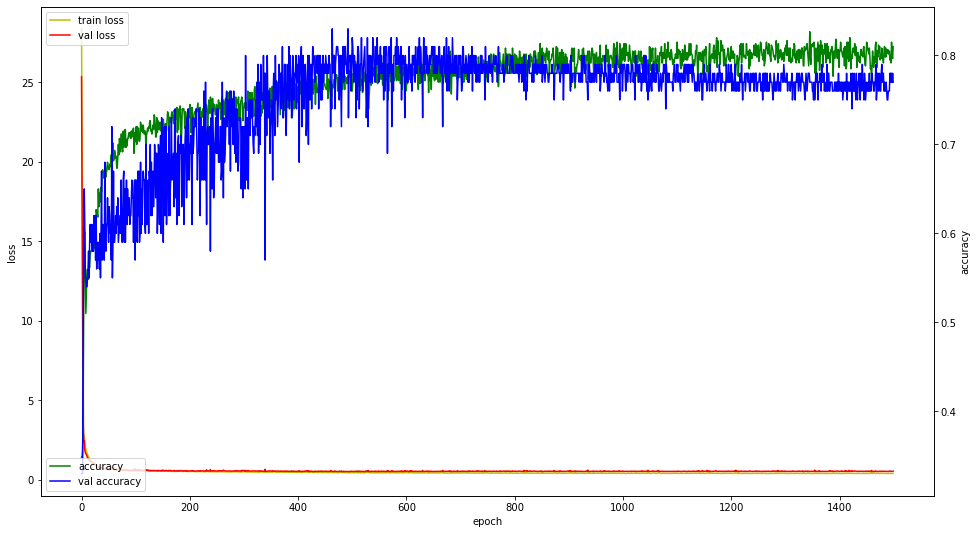

In [12]:
fig, loss_ax = plt.subplots(figsize = (16, 9))
loss_ax.plot(hist.history['loss'], 
             'y',
             label = 'train loss')
loss_ax.plot(hist.history['val_loss'],
             'r',
             label="val loss")

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 
            'g', 
            label = 'accuracy')
acc_ax.plot(hist.history['val_accuracy'],
            'b',
            label='val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

In [15]:
score = model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 983us/step - loss: 0.6193 - accuracy: 0.7647


In [16]:
x_train[0]

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ])

In [17]:
model.predict(np.array([[6,148,72,35,0,33.6,0.62,30]])).argmax()

1

In [18]:
model.predict_classes(np.array([[6,148,72,35,0,33.6,0.62,30]]))

C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1], dtype=int64)